# Example Analysis 1
This notebook will serve as a tutorial on how to use the functions found in `helper_functions/analysis_functions`. We will walk through a 25 round simulation. I will show the configuration of the simulation at the end of the file.

Let's first import what we need and load our data. 

In [10]:
import pandas as pd
import os
os.chdir(r'C:\Users\Justin Tse\Documents\EvolutionSim') # Replace this with a local call
from helper_functions.analysis_functions import plot_traits, plot_population, plot_survival, name_key, get_dist_plot, get_joyplot

In [3]:
dt = pd.read_csv('logs/example_1.csv')

## Overall Population Statistics

Let's first look at a population summary of the simulation. 

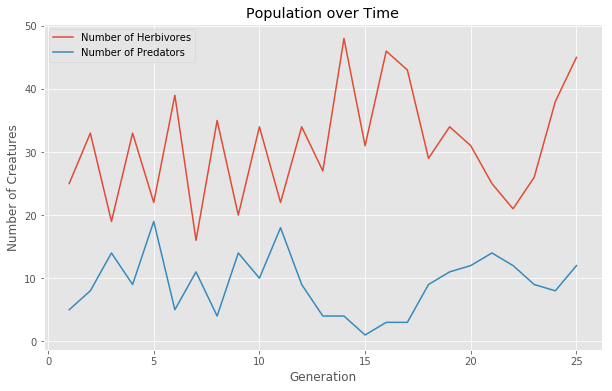

In [4]:
plot_population(dt)

The population of both types of creatures stays roughly constant throughout the generations. Note that the predators were close to going extinct in round 15, fortunately the population recovered. Although values of food are slightly randomized, the number of food of each type stays constant in each generation. 

Let's look at the survival statistics of each type of creature throughout the simulation.

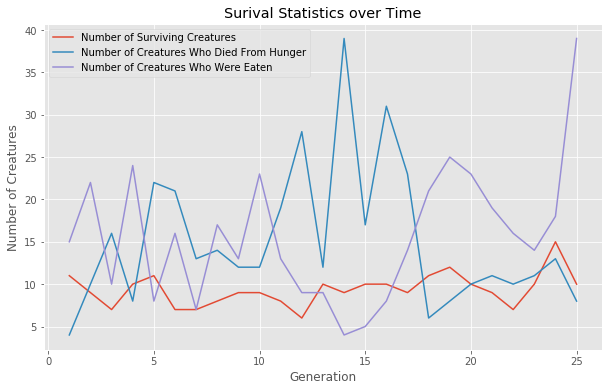

In [5]:
plot_survival(dt)

Fill this in  

## Herbivore Analysis
Let's now take a deeper look at traits over time for the Herbivores. 

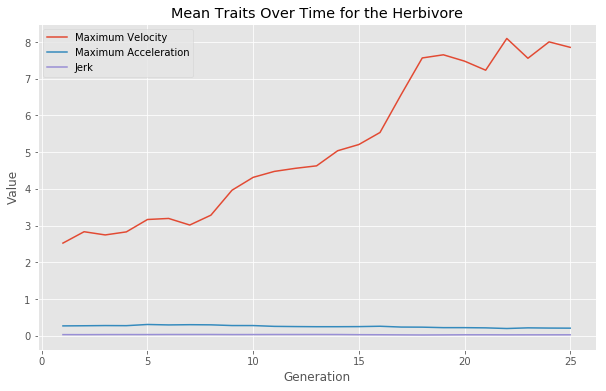

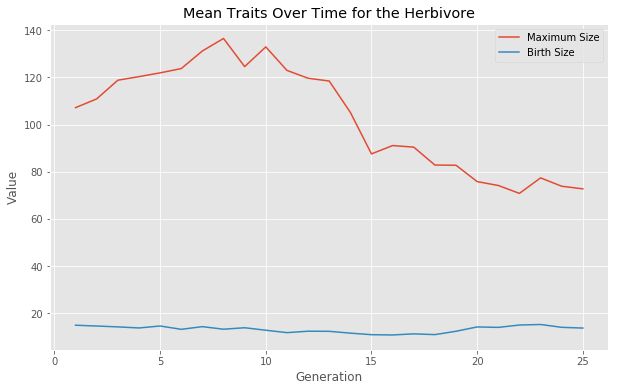

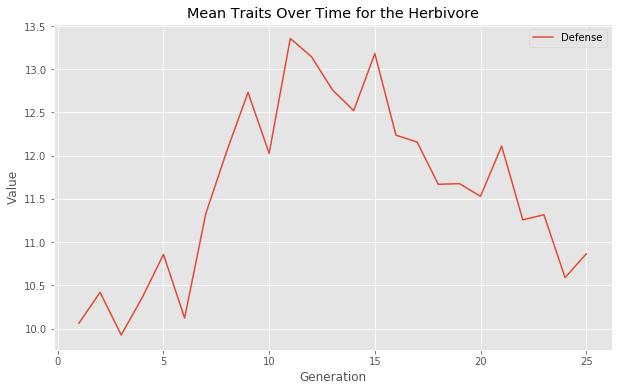

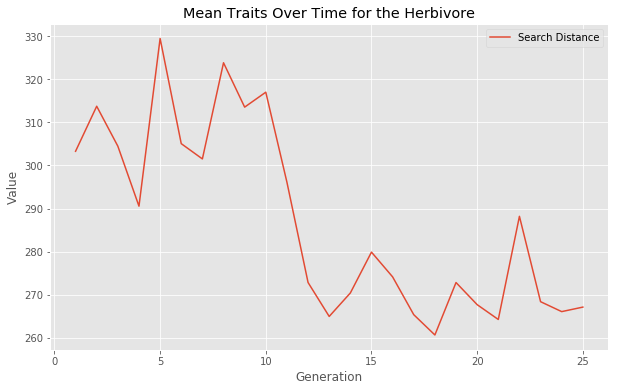

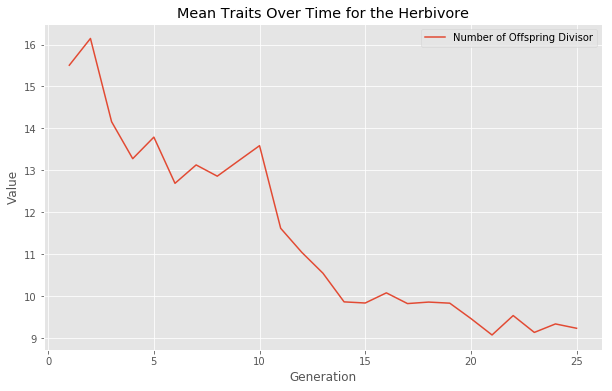

In [6]:
plot_traits(dt, ['birth_vel_max', 'birth_acc_max', 'birth_jerk'], 'searcher')
plot_traits(dt, ['max_size', 'birth_width'], 'searcher')
plot_traits(dt, ['defense'], 'searcher')
plot_traits(dt, ['search_distance'], 'searcher')
plot_traits(dt, ['num_offspring_divisor'], 'searcher')

Fill this in

## Predator Analysis
blah blah blah

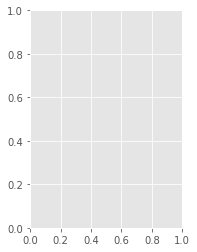

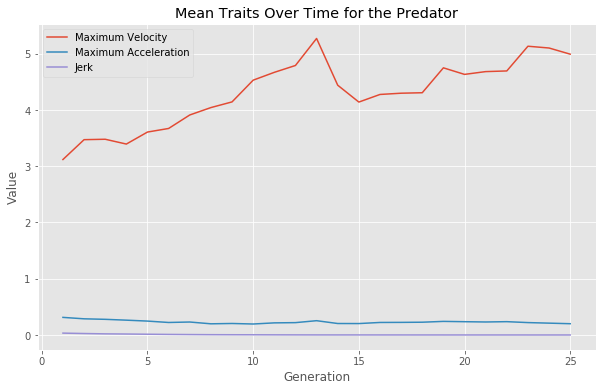

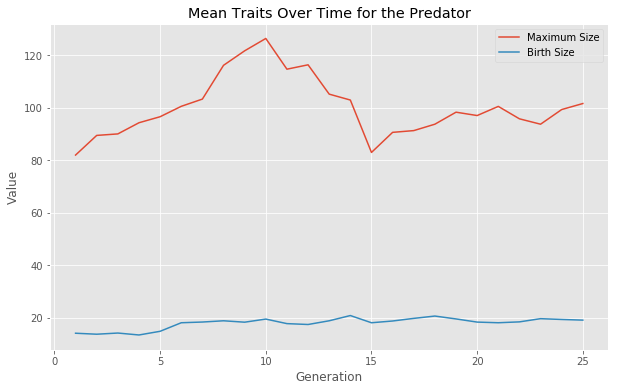

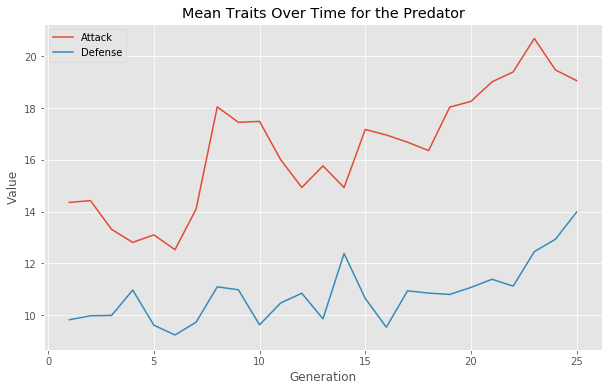

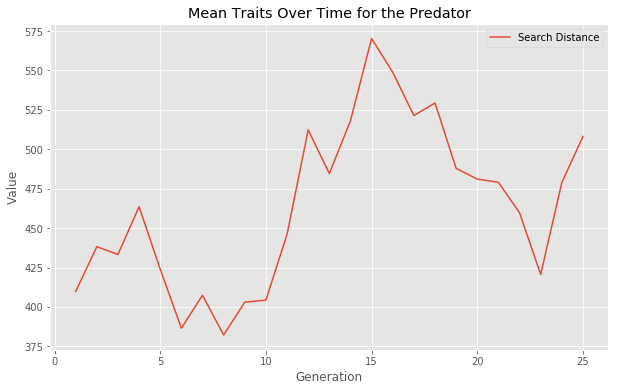

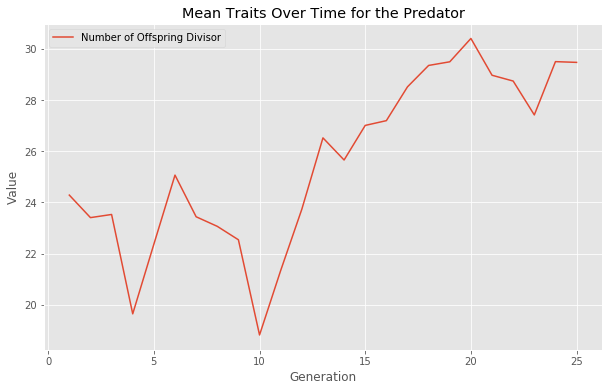

In [13]:
plot_traits(dt, ['birth_vel_max', 'birth_acc_max', 'birth_jerk'], 'predator')
plot_traits(dt, ['max_size', 'birth_width'], 'predator')
plot_traits(dt, ['attack', 'defense'], 'predator')
plot_traits(dt, ['search_distance'], 'predator')
plot_traits(dt, ['num_offspring_divisor'], 'predator')

## Creature Deeper Dive
Blah blah blah

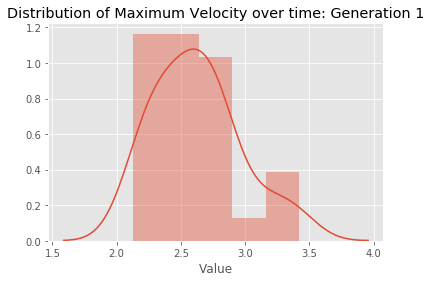

In [11]:
get_dist_plot(dt, 'birth_vel_max', generation=1)

Blah blah lbahh

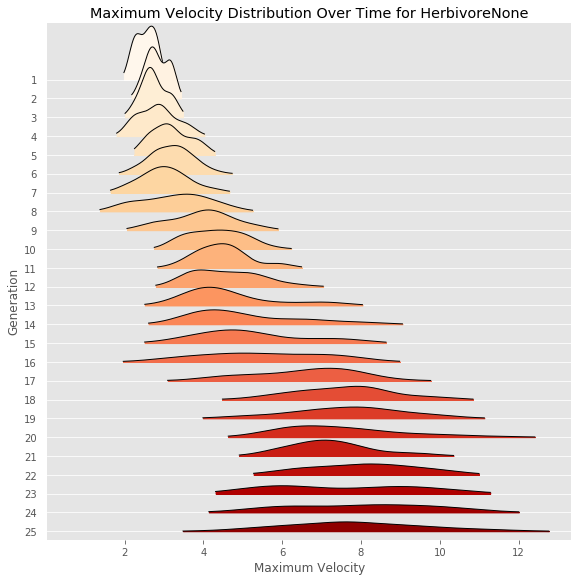

In [14]:
get_joyplot(dt, 'birth_vel_max', 'searcher')

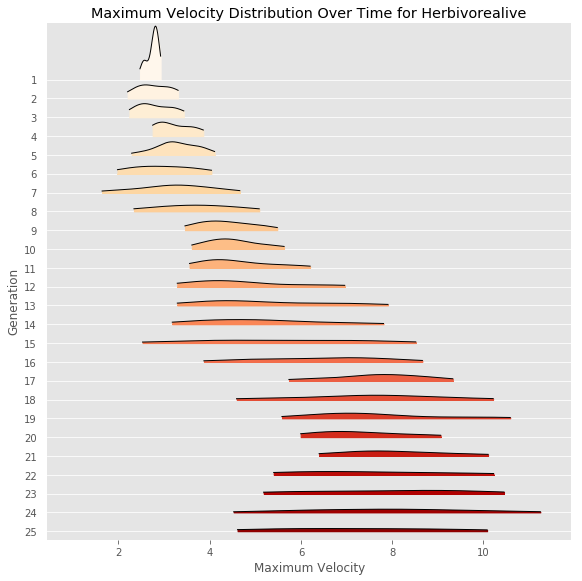

In [15]:
get_joyplot(dt, 'birth_vel_max', 'searcher', 'alive')